# Final exam
## General 

The instruction for the final exam for DS2000B/IS2002B is included in this Jupyter Notebook. 
Some basic rules: 
- You are allowed to use any document and source on your computer and look up documents on the internet. 
- You or not allowed to share documents, or communicate in any other way with people about the final during the 6hr period after the start of the final (2 pm - 8 pm April 23d). 
- You are only allowed to use the packages listed under "preliminaries" - the use of other regression or machine learning toolboxes is not permitted. 
- All the code you are using from previous Assignments or Labs need to be included in the notebook. 
- Most questions also require some written answer. The answer to these questions should be given in full English sentences. 
- All Figures should be appropriately labeled and should have a figure caption. 
- The Final exam needs to be submitted on OWL (Assignments->Final) before 6 pm (unless you have an extension.)

## Preliminaries

In [5]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as ss
import pandas as pd 
import numpy as np
import scipy.optimize as so
import seaborn as sns

In [6]:
# import functions


## Data set

The data frame contains the total number of confirmed Covid-19 infections, vaccination data, and number of deaths as of March 8th, 2022, across 79 countries. It also contains some basic socio-economic data from these countries. 
- continent: - continent: Asia, Europe, Africa, Oceania, North America, South America. 
- country: Name of the country 
- total_cases: total number of COVID cases by March 8th, 2022
- total_deaths: total number of COVID19 deaths by March 8th, 2022
- total_vaccinations: total number of vaccines 
- people_fully_vaccinated: number of people who had two doses of vaccine 
- population: Population size 
- median_age: Median Age of the population 
- gdp_per_capita: Gross Domestic Product (GDP) per capita in US Dollars
- diabetes_prevalence: share of the population with diabetes
- hospital_beds: Number of Hospital beds per 1000 inhabitants 
- life_expectancy: life expectancy in years
- HDI: Human Development Index. A composite index combining life expectancy, years of education, and GDP per capita.

## Task 1: Vaccination rate (40 pts)
In this task we are looking at vaccination rate across different countries.

### Question 1 (3 pts) 
Load the data set 'covid19_2022.csv'. How many observations and variables do you have? Show the first few rows.

In [7]:
df = pd.read_csv('covid_2022.csv')

In [8]:
df

,continent,country,total_cases,total_deaths,total_vaccinations,people_fully_vaccinated,population,median_age,gdp_per_capita,diabetes_prevalence,hospital_beds,life_expectancy,HDI
0,Africa,Angola,98829,1900,16850195.0,5699666,33933611,16.8,5819.495,3.94,0.800,61.15,0.581
1,South America,Argentina,8949362,126901,94883369.0,36679370,45605823,31.9,18933.907,5.50,5.000,76.67,0.845
2,North America,Aruba,33732,212,168150.0,80608,107195,41.2,35973.781,11.62,0.002,76.29,0.908
3,Oceania,Australia,3459870,5495,54659334.0,20568346,25788217,37.9,44648.710,5.07,3.840,83.44,0.944
4,Asia,Azerbaijan,789757,9547,13176571.0,4796474,10223344,32.4,15847.419,7.11,4.700,73.00,0.756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,North America,United States,79373683,958932,558438143.0,217137379,332915074,38.3,54225.446,10.79,2.770,78.86,0.926
75,South America,Uruguay,857635,7059,7739064.0,2780317,3485152,35.6,20551.409,6.93,2.800,77.91,0.817
76,Asia,Vietnam,4776873,40977,198647028.0,77509406,98168829,32.6,6171.884,6.00,2.600,75.40,0.704
77,Africa,Zambia,314159,3959,3073602.0,2007025,18920657,17.7,3689.251,3.94,2.000,63.89,0.584


>We have 79 observations and 13 variables.

### Question 2  (6 pts)
To calculate the vaccination rate, we need to normalize the number of fully vaccinated people ('people_fully_vaccinated') by the population of the country ('population'). Make a new column in the data frame, called 'vax_rate', that codes for the vaccination rate per capita.
Plot a histogram of the distribution using the appropriate number of bins.

Written answer: How would you characterize the distribution in terms of modality and skew?

Text(0, 0.5, 'Count')

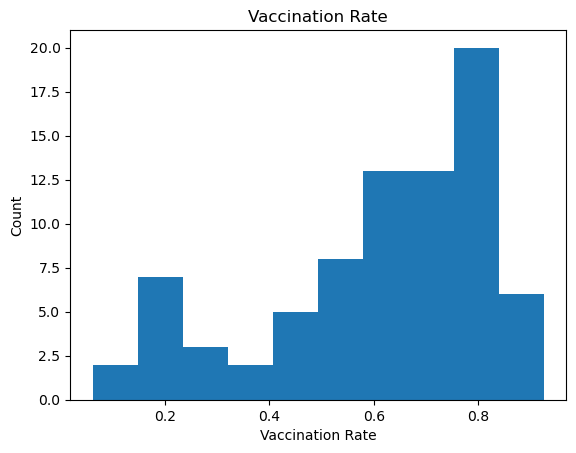

In [9]:
df['vax_rate'] = df['people_fully_vaccinated']/df['population']
fig = plt.figure()
plt.hist(df['vax_rate'],bins=10)
plt.title("Vaccination Rate")
plt.xlabel('Vaccination Rate')
plt.ylabel('Count')

>It is left or negatively skewed, and is bimodal (largest peak around 0.8 and another smaller peak around 0.2)

### Question 3 (5 pts)
Let's look at how to explain the differences in the vaccination rates. 

First, let's consider the Human Development Index (HDI) that combines life expectancy, years of education, and GDP per capita. Make a scatterplot of HDI (x-axis) and Vaccination Rate (y-axis). 

Written answer: What relationship do you observe? Give at least 2 possible reasons that could explain such a relationship. 


Text(0.5, 0, 'HDI')

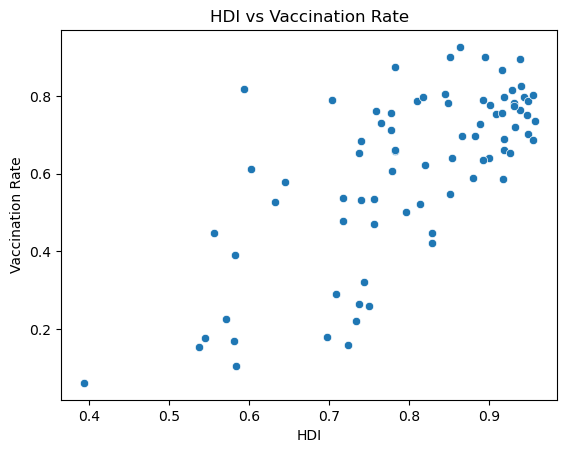

In [10]:
sns.scatterplot(x="HDI",y="vax_rate",data=df)
plt.title("HDI vs Vaccination Rate")
plt.ylabel('Vaccination Rate')
plt.xlabel('HDI')

>I see a positive relationship. This can be explained by saying that more developed countries have more access to vaccines, as well as people in more developed countries are better educated and understand the need for the vaccines.

### Question 4 (4 pts)
Fit a simple linear regression model, explaining vaccination rate by the human development index (HDI). 
Report the R2 value of the fit. 

Then plot the data and the prediction line. Don't forget the Figure caption. 

The R2 value of the fit is 0.5025017754897312


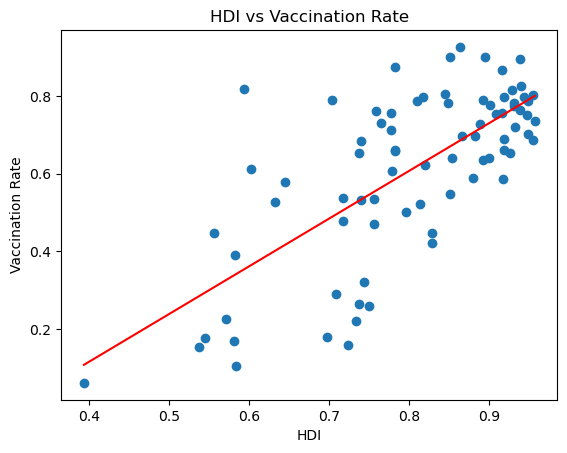

In [11]:
def simpleRegPredict(b,x):
    yp=b[0]+b[1]*x
    return yp 

def simpleRegLossRSS(b,x,y):
    predY = simpleRegPredict(b,x)
    res = y-predY
    rss = sum(res**2)
    deriv = np.zeros(2)
    deriv[0]=-2*sum(res)
    deriv[1]=-2*sum(res*x)
    return (rss,deriv)

def simpleRegLossSAD(b,x,y):
    predY = simpleRegPredict(b,x)
    res = y-predY
    sad = sum(res.abs())
    deriv = np.zeros(2)
    deriv[0]=-sum(np.sign(res))
    deriv[1]=-sum(np.sign(res)*x)
    return (sad,deriv)

def plotPrediction(b,x,y,predfcn):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x,y)
    xp = np.linspace(min(x),max(x),num=50)
    yp = predfcn(b,xp)
    ax.plot(xp,yp,'r')
    
def simpleRegFit(x,y,lossFcn=simpleRegLossRSS):
    b0=[np.mean(y),0]
    RES = so.minimize(lossFcn,b0,args=(x,y),jac=True)
    b=RES.x # Results
    plotPrediction(b,x,y,simpleRegPredict)
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,grad = simpleRegLossRSS(b,x,y)
    R2 = 1-RSS/TSS 
    return (R2,b)


R2, b = simpleRegFit(df['HDI'],df['vax_rate'])
plt.xlabel("HDI")
plt.ylabel("Vaccination Rate")
plt.title("HDI vs Vaccination Rate")
print("The R2 value of the fit is",R2)

### Question 5 (4 pts)
What else could explain differences in vaccination rates? We know that vaccination access varies a lot in different regions. Use boxplot to visualize vaccination rate (y axis) for different continents (x axis).

Written answer: what do you observe?

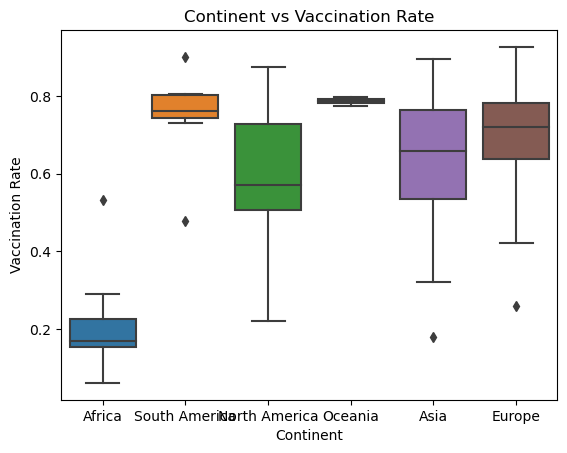

In [12]:
fig = plt.figure()
ax = sns.boxplot(y = 'vax_rate', x = 'continent',  data = df)
plt.ylabel('Vaccination Rate')
plt.xlabel('Continent')
plt.title("Continent vs Vaccination Rate")
plt.show()


>Africa clearly has the lowest rate by far compared to the other continents, with the others all somewhat within the same range.

### Question 6 (10 pts)
Let's investigate whether the relationship between HDI and vaccination rate still holds when we account for the geographical region. 
* First, make a dummy-coded variable that indicates whether the country is in Africa or not (using variable Continent)
* Second, restrict the data to African and European countries. *Hint: If you want a vector of True/False values that indicates whether a column in the data frame (D.col) equals A OR B, you can use  `np.logical_or(D.col==A,D.col==B)`*
* Using this restricted data, fit a regression model, using the dummy-coded variable (Africa vs Europe) and HDI as regressors. 
* Make a scatterplot of HDI against vaccination rates, with different color dots for European and African countries. In the same plot, add seperate regression lines for Africa and Europe from the model that you fit.
* Written answer: describe the resulting plot. How do the two regression lines differ? How would you interpret this?

C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  isAfrica = isInData[df['is_african']==True]
C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  isNotAfrica = isInData[df['is_african']==False]
C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)


Text(0.5, 1.0, 'HDI vs Vaccination Rate (in Africa vs Europe)')

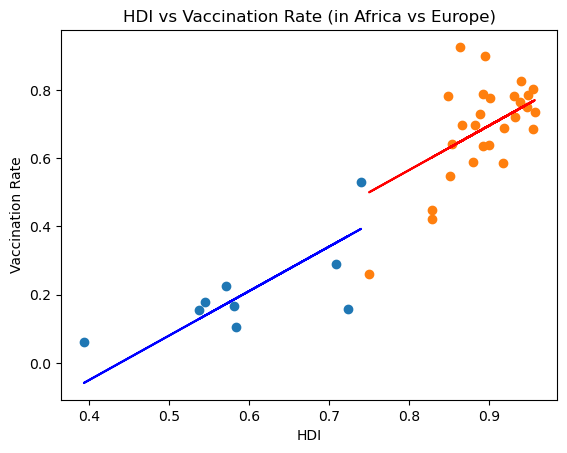

In [13]:
def multRegPredict(b,D,xname):
    yp=np.ones(len(D.index))*b[0]        # Intercept 
    for i in range(len(xname)):          
        yp=yp+D[xname[i]]*b[i+1]         # Add each regression value 
    return yp 

def multRegLossRSS(b,D,y,xname):
    predY = multRegPredict(b,D,xname)
    res = y-predY
    rss = sum(res**2)
    grad=np.zeros(len(b))
    grad[0]=-2*np.sum(res)
    for i in range(len(xname)):
        grad[i+1]=-2*np.sum(D[xname[i]]*res)
    return (rss,grad)

def multRegFit(D,y,xname):
    N=len(xname)
    b0=np.zeros((N+1,1))
    RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)
    if (not(RES.success)):
        print('unsuccessful fit')
        print(RES)
    b=RES.x # Results
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,deriv = multRegLossRSS(b,D,y,xname)
    R2 = 1-RSS/TSS 
    return (R2,b)

df['is_african']=df['continent']=="Africa"
df['is_africa_or_europe']=np.logical_or(df['continent']=="Africa",df['continent']=="Europe")
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#ax.scatter(df[df['is_africa_or_europe']][df['is_african']]['HDI'],df[df['is_africa_or_europe']][df['is_african']]['vax_rate'])
#ax.scatter(df[df['is_africa_or_europe']][df['is_african']==False]['HDI'],df[df['is_africa_or_europe']][df['is_african']==False]['vax_rate'])
#multRegPredict(b,df,['is_african','HDI'])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
isInData = df[df['is_africa_or_europe']==True]
isAfrica = isInData[df['is_african']==True]
isNotAfrica = isInData[df['is_african']==False]
R2,b = multRegFit(isInData,isInData.vax_rate,['HDI', 'is_african'])

ax.scatter(isAfrica.HDI,isAfrica.vax_rate)
yp = multRegPredict(b,isInData,['HDI','is_african'])
ax.plot(isAfrica.HDI,yp[df['is_african']==True],'b-')
ax.scatter(isNotAfrica.HDI,isNotAfrica.vax_rate)
yp = multRegPredict(b,isInData,['HDI','is_african'])
ax.plot(isNotAfrica.HDI,yp[df['is_african']==False],'r')
plt.xlabel("HDI")
plt.ylabel("Vaccination Rate")
plt.title("HDI vs Vaccination Rate (in Africa vs Europe)")

>The Africa line has a lower intercept.

### Question 7 (8 pts)
Use Bootstrap analysis (1000 iterations) to determine whether the relationship between Human Development Index and vaccination rate is significant when we account for whether the country is European or African. Again, limit the analysis to European and African countries only. Report the confidence intervals for the influence of continent and HDI separately. 

Written answer: What do you conclude from the bootstrap in terms of the significance of a relationship between HDI and vaccination rate? What claims can you make? 

In [14]:
def bootstrapReg(D,y,args,fitfcn,numIter=1000):
    r2,b=fitfcn(D,y,args)
    numParams=len(b)
    N = len(D.index)
    ind  = np.arange(N)
    stats = np.zeros((numIter,numParams))
    for i in range(numIter):
        sample=np.random.choice(ind,N)
        r2,stats[i,:]=fitfcn(D.iloc[sample],y[sample],args)
    return stats

def confidenceInt(data,perc):
    Int=(np.percentile(data,(100-perc)/2),np.percentile(data,100-(100-perc)/2))
    return Int

isInData = df[df['is_africa_or_europe']==True].reset_index()
B=bootstrapReg(isInData,isInData.vax_rate,['HDI','is_african'],multRegFit,numIter=10)
Int1=confidenceInt(B[:,1],95)
Int2=confidenceInt(B[:,2],95)
print("Confidence interval for influence of HDI is [{0:3.2f},{1:3.2f}]".format(Int1[0],Int1[1]))
print("Confidence interval for influence of continent [{0:3.2f},{1:3.2f}]".format(Int2[0],Int2[1]))

Confidence interval for influence of HDI is [1.04,1.96]
Confidence interval for influence of continent [-0.19,0.12]


C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)
C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)
C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)
C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: Deprecatio

> The confidence interval of influence of HDI doesn't inclue 0, so we can claim that it is significant.

## Task 2: Mortality rate (40 pts)
### Question 1 (3 pts) 
Define a new column in your dataframe called 'Mortality' which corresponds to the mortality rate. The mortality rate of a disease is defined as the probability that a patient will die, given that he or she contracted the disease (total number of deaths divided by total number of positive cases). Make a histogram of mortality, show the median as a vertical line, and don't forget axis labels. How do you describe the distribution in terms of symmetry and skew? 

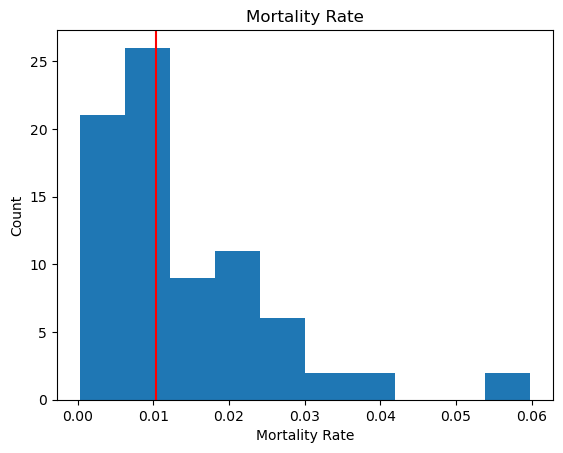

In [15]:
df['Mortality'] = df['total_deaths']/df['total_cases']
fig = plt.figure()
plt.hist(df['Mortality'])
plt.xlabel('Mortality Rate')
plt.ylabel('Count')
plt.title("Mortality Rate")
plt.axvline(df['Mortality'].median(),color='r')

>It is right or positively skewed and unimodal, so it is assymetric of course.

### Question 2  (6 pts)
Why may TotalDeaths/TotalCases not be a good estimator for the true mortality rate? See the definition of Mortality rate in question 1. Name at least 1 factor that could make your estimate lower than the true mortality rate, and 1 factor that would make the estimate higher than the true mortality rate. For each factor you describe, explain what data a research team could realistically acquire within a month of work to make the estimate of mortality better.

> The estimate could be higher than the actual rate because many may have had pre-existing health conditions which worsened their virus, as well as many people not getting tested for the virus altogether. To counter this, they could try to look at healthy and non-healthy people separately. The estimate could be lower than the actual rate because many countries may not truthfully report, which can be countered by having an independent group report themselves or by only using data from trusted countries.

### Question 3 (5 pts) 
Question 3-6 look at the influence of human development index (HDI) and number of hospital beds per 1000 people ('hospital_beds') on mortality rate. First, run a multiple regression analysis of mortality (response variable) as a function of HDI (with figure, don't forget to label the axes). 

Written answer: How would you describe the relationship between HDI and mortality? Write down the regression equation. Report the R2 value and the slope value for HDI. What does the R2 and the slope value mean? 

In [16]:
R2,b = multRegFit(df,df.Mortality,['HDI'])

print("The R2 value is",R2,"and the slope is",b)

The R2 value is 0.16493998022728662 and the slope is [ 0.04439951 -0.03817693]


C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)


> The R2 is the proportion of variance in mortality rate explained by the HDI. In this case, about 16.5% of variance is explained by the model. The slope value (b) means for each point increase in HDI, morality decreases by this value (0.0382), so the relationship is negative.

### Question 4 (4 pts)
Run a multiple regression analysis of mortality as a function of number of hospital beds (with figure).  Again, report the R2 value and the slope for hospital beds. Based on the slope, does the number of hospital beds have an influence on mortality? 

In [17]:
R2,b = multRegFit(df,df.Mortality,['hospital_beds'])

print("The R2 value is",R2,"and the slope is",b)

The R2 value is 0.06023148438187842 and the slope is [ 0.01789186 -0.00118243]


C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)


>The R2 value indicated that the number of hospital beds per 1000 people does not have a very significant effect on mortality rate.

### Question 5  (4 pts)
Now run a multiple regression analysis of mortality with both HDI and hospital beds as predictors. How has R2 changed from the answer the obtained in Question 2? Based on the new slope, what can you conclude about the influence of HDI on mortality (after controlling for the number of hospital beds)? 

In [18]:
R2,b = multRegFit(df,df.Mortality,['HDI', 'hospital_beds'])

print("The R2 value is",R2,"and the slope is",b)

The R2 value is 0.16672313124408678 and the slope is [ 0.04331103 -0.03579085 -0.00023742]


C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)


>As the R2 value stayed nearly the same, we can conclude the HDI does have an influence on mortality.

### Question 6 (6 pts)
Use Leave-one-out-crossvalidation and backward step-wise-regression to build the best predictive model of mortality using as candidates the five explanatory variables: HDI, diabetes prevalence, median age, hospital beds, and vaccination rate.

Show all steps of the step-wise regression explicitly and comment on the decisions you make in the process (and why you made them). Report the formula for the best predictive model that you found. 

In [19]:
def leaveOneOutCV(D,y,args=(),fitfcn=multRegFit,predictfcn=multRegPredict):
    N = len(y) #Number of observations
    yp= np.zeros(N)
    ind = np.arange(N)
    
    # Get overall model fit 
    R2,b_all=fitfcn(D,y,args)

    # Loop over the crossvalidation folds 
    for i in range(N):
        r,b=fitfcn(D[ind!=i],y[ind!=i],args)
        yp[ind==i]=predictfcn(b,D[ind==i],args)
        
    # Calculate crossvalidated model fit 
    TSS  = sum((y-y.mean())**2)
    RSScv = sum((y-yp)**2)
    R2cv = 1-RSScv/TSS
    return R2cv,R2 

In [20]:
print("All",leaveOneOutCV(df,df.Mortality,args=['HDI','diabetes_prevalence','median_age','hospital_beds','vax_rate']))
print("HDI removed",leaveOneOutCV(df,df.Mortality,args=['diabetes_prevalence','median_age','hospital_beds','vax_rate']))
print("diabetes_prevalence removed",leaveOneOutCV(df,df.Mortality,args=['HDI','median_age','hospital_beds','vax_rate']))
print("median_age removed",leaveOneOutCV(df,df.Mortality,args=['HDI','diabetes_prevalence','hospital_beds','vax_rate']))
print("hospital_beds removed",leaveOneOutCV(df,df.Mortality,args=['HDI','diabetes_prevalence','median_age','vax_rate']))
print("vax_rate removed",leaveOneOutCV(df,df.Mortality,args=['HDI','diabetes_prevalence','median_age','hospital_beds']))

C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)


All (0.04460020714423818, 0.1775379870752949)
HDI removed (0.026445672581839386, 0.14896419670515826)
diabetes_prevalence removed (0.06821341457568453, 0.16754711690699542)
median_age removed (0.0728331416930047, 0.176532005394352)
hospital_beds removed (0.061040767395897144, 0.1774685589324747)
vax_rate removed (0.06863128760694925, 0.17710172303378702)


>The highest R2cv was provided by removing median age, so we'll remove that.

In [21]:
print("All",leaveOneOutCV(df,df.Mortality,args=['HDI','diabetes_prevalence','hospital_beds','vax_rate']))
print("HDI removed",leaveOneOutCV(df,df.Mortality,args=['diabetes_prevalence','hospital_beds','vax_rate']))
print("diabetes_prevalence removed",leaveOneOutCV(df,df.Mortality,args=['HDI','hospital_beds','vax_rate']))
print("hospital_beds removed",leaveOneOutCV(df,df.Mortality,args=['HDI','diabetes_prevalence','vax_rate']))
print("vax_rate removed",leaveOneOutCV(df,df.Mortality,args=['HDI','diabetes_prevalence','hospital_beds']))

C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)


All (0.0728331416930047, 0.176532005394352)
HDI removed (0.01384457635459091, 0.1098215489936375)
diabetes_prevalence removed (0.09448258773317864, 0.16684289538592156)
hospital_beds removed (0.09045932636154985, 0.17595482877324065)
vax_rate removed (0.09087106098800879, 0.17631796834985092)


>The highest R2cv was provided by removing the hospital_beds so we'll remove that.

In [22]:
print("All",leaveOneOutCV(df,df.Mortality,args=['HDI','diabetes_prevalence','vax_rate']))
print("HDI removed",leaveOneOutCV(df,df.Mortality,args=['diabetes_prevalence','vax_rate']))
print("diabetes_prevalence removed",leaveOneOutCV(df,df.Mortality,args=['HDI','vax_rate']))
print("vax_rate removed",leaveOneOutCV(df,df.Mortality,args=['HDI','diabetes_prevalence']))

C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)


All (0.09045932636154985, 0.17595482877324065)
HDI removed (0.005052667363609098, 0.08044703918592)
diabetes_prevalence removed (0.11163737035607979, 0.16523109892782084)
vax_rate removed (0.10925929163551817, 0.1756129857873444)


>The biggest R2cv was provided by removing diabetes_prevalence, so we'll remove that.

In [23]:
print("All",leaveOneOutCV(df,df.Mortality,args=['HDI','vax_rate']))
print("HDI removed",leaveOneOutCV(df,df.Mortality,args=['vax_rate']))
print("vax_rate removed",leaveOneOutCV(df,df.Mortality,args=['HDI',]))

C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)


All (0.11163737035607979, 0.16523109892782084)
HDI removed (0.034956925658451654, 0.07609811256800625)
vax_rate removed (0.12920827323608564, 0.16493998022728662)


>We can see the best model has been to use HDI alone.

### Question 7 (2 pts)
Let's now look at mortality rate by continent. Make a boxplot of continent on the x-axis and mortality on the y-axis. Which continent has the highest overall mortality?  

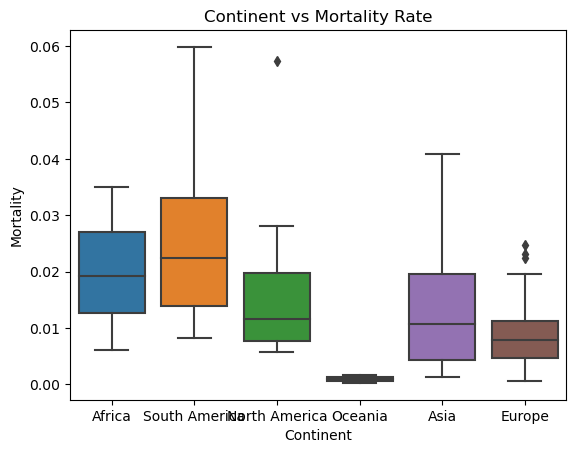

In [24]:
fig = plt.figure()
ax = sns.boxplot(x = 'continent', y = 'Mortality',  data = df)
plt.title("Continent vs Mortality Rate")
plt.xlabel('Continent')
plt.show()

>South America seems to half the highest mortality.

### Question 8  (5 pts)
Create a set of dummy variables that together code the continents. Set Oceania to be your comparison group. Run a multiple regression model of mortality with the dummy variables as explanatory variables. Report the interecept and slope values. What do the intercept and slope values mean? 

In [25]:
df['AF'] = np.double(df.continent=='Africa')
df['SA'] = np.double(df.continent=='South America')
df['NA'] = np.double(df.continent=='North America')
df['AS'] = np.double(df.continent=='Asia')
df['EU'] = np.double(df.continent=='Europe')

R2, b = multRegFit(df, df.Mortality, ['AF','SA','NA','AS','EU'])
print("Intercept {0:3.3f}".format(b[0]))
print("Africa Slope {0:3.3f}".format(b[1]))
print("South America Slope {0:3.3f}".format(b[2]))
print("North America Slope {0:3.3f}".format(b[3]))
print("Asia Slope {0:3.3f}".format(b[4]))
print("Europe {0:3.3f}".format(b[5]))
R2

Intercept 0.001
Africa Slope 0.018
South America Slope 0.025
North America Slope 0.016
Asia Slope 0.012
Europe 0.008


C:\Users\TheWh\AppData\Local\Temp\ipykernel_20320\44155826.py:20: DeprecationWarning: Use of `minimize` with `x0.ndim != 1` is deprecated. Currently, singleton dimensions will be removed from `x0`, but an error will be raised in SciPy 1.11.0.
  RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)


0.21514395375703743

> The intercept shows the mortality rate for Oceania. Moving the decimal place thrice right in the other mortality rates, and you see how many more times each continents mortality rate is.

### Question 9  (5 pts)
Repeat the same model but this time add human development index (HDI) as one of the regressors. Report R2. How does the R2 change? Is it meaningful?

In [ ]:
R2, b = multRegFit(df,df.Mortality,["is_oceania","HDI"])
print("R2 is",R2,"and b is",b)

R2 is 0.17626688248954747 and b is [ 0.04319306 -0.00814618 -0.0364154 ]


>R2 changes from 0.03 to 0.176 which is definitely meaningful.

Now use cross-validation to compare the following two models:
1. mortality as a function of continents (previous question)
2. mortality as a function of continents and HDI

Which model is better? How do you explain changes in R2 with the addition of HDI? What do you conclude about the effect of the continent on mortality?

In [ ]:
print(leaveOneOutCV(df,df.Mortality,args=["is_oceania"]))

(0.004785141528456327, 0.030709409872214932)


In [ ]:
print(leaveOneOutCV(df,df.Mortality,args=["is_oceania","HDI"]))

(0.1398129689928902, 0.17626688248954747)


>It seems when HDI is included, it gives a much better fit. We can conclude that continent has a negligible effect on mortality.

## Task 3: Logistic regression (20 pts)
### Question 1 (5 pts) 
Generate a new column in the data frame called high_gdp that assigns a value of 1 to indices with GDP larger than 15000, and 0 to the rest. Make a scatter plot (with labeled axes, and caption) that shows life expectancy on the x-axis and high_gdp on the y axis. Written answer: what do you observe?

Text(0, 0.5, 'High GDP')

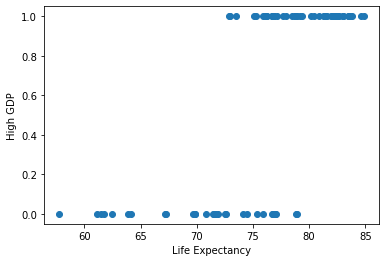

In [ ]:
df["high_gdp"] = (df["gdp_per_capita"]>15000).astype(int)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df.life_expectancy,df.high_gdp)
plt.xlabel("Life Expectancy")
plt.ylabel("High GDP")

>It seems clear that when a country has a GDP above 15000, it also has a higher life expectancy.

### Question 2 (5 pts) 
Fit a logistic regression model that predicts whether a country has high or low GDP based on its life expectancy. Make sure to return a figure of the results (complete with axes and caption). Print out the optimal parameters and interpret your result (negative log likelihood). Is it meaningful? 

The optimal parameters are [-40.96538717   0.54551327] and the negative log likelyhood is -24.230868035748475


C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


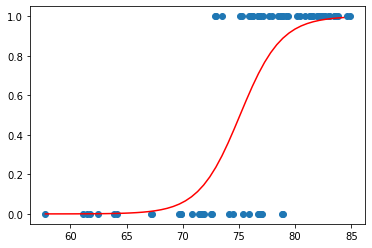

In [ ]:
def logisticRegPredict(b,D,xname):
    yp=np.ones(len(D.index))*b[0]       # Start out with the intercept  
    for i in range(len(xname)):
        yp=yp+D[xname[i]]*b[i+1]        # Add the prediction of each regressor seperately 
    p = np.exp(yp)/(1+np.exp(yp))
    return p

def logisticRegFit(D,y,xname,figure=1):
    N=len(xname)
    b0=np.zeros(N+1)
    RES = so.minimize(logisticRegLoss,b0,args=(D,y,xname),jac=True)
    b = RES.x
    ll = -RES.fun # Negative function value is the log likelihood 
    p = logisticRegPredict(b,D,xname)
    if (N==1 & figure==1):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(D[xname[0]],y)
        xRange=[min(D[xname[0]]),max(D[xname[0]])]
        xp=np.arange(xRange[0],xRange[1],(xRange[1]-xRange[0])/50)
        yp=b[0]+b[1]*xp
        pp=np.exp(yp)/(1+np.exp(yp))
        ax.plot(xp,pp,'r-')
#         ax.spines['top'].set_visible(False)
#         ax.spines['right'].set_visible(False)
    return (ll,b)


def logisticRegLoss(b,D,y,xname):
    p = logisticRegPredict(b,D,xname)
    cost = -y*np.log(p)-(1-y)*np.log(1-p)
    N=len(xname)
    grad=np.zeros(N+1)
    res = y-p
    grad[0]=-sum(res)
    for i in range(N):
        grad[i+1]=-np.sum(D[xname[i]]*res)         # Add each regressor 
    return (cost.sum(),grad)

ll,b = logisticRegFit(df,df.high_gdp,["life_expectancy"])
print("The optimal parameters are",b,"and the negative log likelyhood is",ll)

> The log likelihood on its own doesn't mean much, you must compare to something else.

### Question 3 (4 pts) 
Now try a different logistic regression model that uses both life expectancy and mortality to predict whether a country has high GDP or not. How does the model compare to the previous one? Explain whether we can interpret the difference between the two models and motivate why.

In [ ]:
ll,b = logisticRegFit(df,df.high_gdp,["life_expectancy","Mortality"])
print("The optimal parameters are",b,"and the negative log likelyhood is",ll)

The optimal parameters are [-38.91417704   0.5274156  -37.48468454] and the negative log likelyhood is -23.279050870923516


C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


>Because there is only a 1~ difference, this means it is not really worth mentioning the difference between the two models. This may be because mortality rate is also a good measure of high GDP.

### Question 4 (6 pts)
Using leave-one-out-crossvalidation, compare first the simple intercept model (b0 only) to the model that also uses life expectancy as explanatory variable for high GDP (on top of the intercept).

Next, compare this model (intercept + life expectancy) to one that additionally includes also the human development index (HDI).

For each comparison, calculate the the difference in crossvalidated log-likelihood and answer the following questions: which one is the best model? How confident are you in your result?

In [ ]:
def leaveOneOutCVlog(D,y,args=(),fitfcn=logisticRegFit,predictfcn=logisticRegPredict):
    N = len(y) #Number of observations
    yp= np.zeros(N)
    ind = np.arange(N)
    
    # Get overall model fit 
    ll,b_all=fitfcn(D,y,args,figure=0)

    # Loop over the crossvalidation folds 
    for i in range(N):
        r,b=fitfcn(D[ind!=i],y[ind!=i],args,figure=0)
        yp[ind==i]=predictfcn(b,D[ind==i],args)
        
    # Calculate crossvalidated model fit 
    TSS  = sum((y-y.mean())**2)
    RSScv = sum((y-yp)**2)
    R2cv = 1-RSScv/TSS
    llcv,bcv = fitfcn(D,yp,args,figure=0)
    return llcv

llcv0 = leaveOneOutCVlog(df,df.high_gdp,args=[])
print("LLcv of intercept only is",llcv0)

LLcv of intercept only is -51.933650984527645


In [ ]:
llcv1 = leaveOneOutCVlog(df,df.high_gdp,args=["life_expectancy"])

print("LLcv of life expectancy is",llcv1)
print("Difference between model with and without life expectancy is",(llcv1-llcv0))

C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in l

C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in l

C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in l

LLcv of life expectancy is -24.196606784562498
Difference between model with and without life expectancy is 27.737044199965148


C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in l

>Because the difference i large, we can conclude life expectancy has a large effect on high gdp.

In [ ]:
llcv2 = leaveOneOutCVlog(df,df.high_gdp,args=["life_expectancy","HDI"])
print("LLcv of both only is",llcv2)
print("Difference between model with both life expectancy and HDI and without HDI is",(llcv2-llcv1))
print("Difference between model with both life expectancy and HDI and intercept only is",(llcv2-llcv0))

C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in l

C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in l

C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in l

C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in l

LLcv of both only is -13.464347623995764
Difference between model with both life expectancy and HDI and without HDI is 10.732259160566734
Difference between model with both life expectancy and HDI and intercept only is 38.46930336053188


C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\TheWh\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


>The difference in LLcv with or without HDI in both cases is large, and both significant. This means both HDI and life expectancy have a large effect on whether a country has a high gdp or not, and the best model is using both.